## Testing the New Models

### Meyer Dataset

#### Reconstruction Property

Imports

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Data

In [13]:
data=np.load('data/dataset_meyer/dataset_meyer_test_256_100.npz')
n=data['density']
f=data['F']
e=data['energy']
n_torch=torch.from_numpy(n)[-100:]
f_torch=torch.from_numpy(f)[-100:]
e_torch=torch.from_numpy(e)[-100:]
model=torch.load('model_dft_pytorch/meyer_case/DFTVAEnorm_hidden_channels_vae_[60, 60, 60, 60, 60]_hidden_channels_dft_[60, 60, 60, 60, 60]_kernel_size_13_pooling_size_2_latent_dimension_16_l1_0.0_l2_0.001',map_location='cpu')
#model=torch.load('model_dft_pytorch/meyer_case/meyer_model_60_hc_13_ks_2_ps_[40, 40, 40, 40, 40]_hidden_neurons_16_ls_0.0_alpha_0.01_vb',map_location='cpu')
model.eval()
model=model.double()


Reconstruction Test

In [14]:
n_torch = n_torch.unsqueeze(1)
latent_mu, latent_logvar = model.Encoder(n_torch)
n_recon = model.Decoder(latent_mu)
dx=1/256
print(n_recon.shape)
dn=torch.sum(torch.abs(n_torch.squeeze(1)-n_recon.squeeze(1)),dim=-1)*dx
dn=dn.mean()
print(dn.item())

torch.Size([100, 1, 256])
0.0013234195449086067


Visualization

In [ ]:
n_recon_img=n_recon.squeeze(1).detach().cpu().numpy()
n_img=n_torch.squeeze(1).detach().cpu().numpy()

for i in range(3):
    plt.plot(n_recon_img[i])
    plt.plot(n_img[i])
    plt.show()

Prediction Test (MODEL B)

In [ ]:
print(n_torch.shape)
latent_mu, latent_logvar = model.Encoder(n_torch)
f_ml=model.DFTModel(latent_mu).view(-1)

df=torch.abs(f_torch-f_ml)

print(df.mean()*627,df.std()*627)


Prediction Test (MODEL A)

In [17]:

f_ml=model.DFTModel(n_torch).view(-1)

df=torch.abs(f_torch-f_ml)

print(df.mean()*627,df.std()*627)

tensor(0.7091, dtype=torch.float64) tensor(0.6309, dtype=torch.float64)


### Speckle Dataset

#### Reconstruction Property

Imports

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Data

In [3]:
data=np.load('data/final_dataset/data_test.npz')
n=data['density']
f=data['F']
e=data['energy']
n_torch=torch.from_numpy(n)[-100:]
f_torch=torch.from_numpy(f)[-100:]
e_torch=torch.from_numpy(e)[-100:]
model=torch.load('model_dft_pytorch/speckle_case/DFTVAEnorm_hidden_channels_vae_[60, 60, 60, 60, 60]_hidden_channels_dft_[60, 60, 60, 60, 60]_kernel_size_13_pooling_size_2_latent_dimension_16_l1_0.0_l2_0.001',map_location='cpu')
#model=torch.load('model_dft_pytorch/meyer_case/meyer_model_60_hc_13_ks_2_ps_[40, 40, 40, 40, 40]_hidden_neurons_16_ls_0.0_alpha_0.01_vb',map_location='cpu')
model.eval()
model=model.double()


Reconstruction Test

In [4]:
n_torch = n_torch.unsqueeze(1)
latent_mu, latent_logvar = model.Encoder(n_torch)
n_recon = model.Decoder(latent_mu)
dx=1/256
print(n_recon.shape)
dn=torch.sum(torch.abs(n_torch.squeeze(1)-n_recon.squeeze(1)),dim=-1)*dx
dn=dn.mean()
print(dn.item())

torch.Size([100, 1, 256])
0.003185480527895136


Visualization

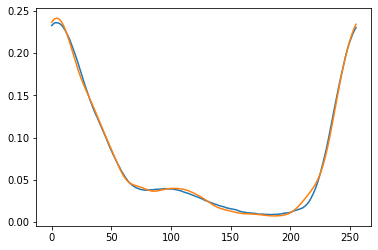

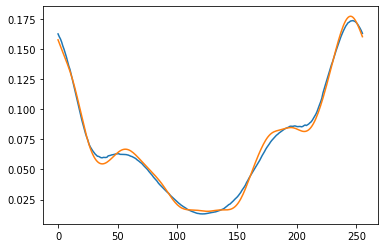

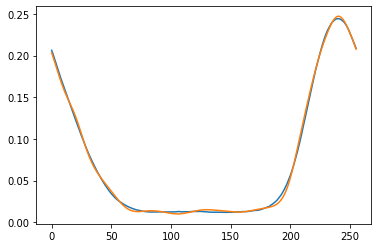

In [5]:
n_recon_img=n_recon.squeeze(1).detach().cpu().numpy()
n_img=n_torch.squeeze(1).detach().cpu().numpy()

for i in range(3):
    plt.plot(n_recon_img[i])
    plt.plot(n_img[i])
    plt.show()

Prediction Test (MODEL B)

In [6]:
print(n_torch.shape)
latent_mu, latent_logvar = model.Encoder(n_torch)
f_ml=model.DFTModel(latent_mu).view(-1)

df=torch.abs(f_torch-f_ml)

print(df.mean()*627,df.std()*627)


torch.Size([100, 1, 256])


RuntimeError: Expected 3-dimensional input for 3-dimensional weight [60, 1, 13], but got 2-dimensional input of size [100, 16] instead

Prediction Test (MODEL A)

In [7]:

f_ml=model.DFTModel(n_torch).view(-1)

df=torch.abs(f_torch-f_ml)

print(df.mean()*627,df.std()*627)

tensor(0.0575, dtype=torch.float64) tensor(0.0508, dtype=torch.float64)


## Test the Gradient Descent

### Meyer Dataset

#### Different $\beta=0.1,0.001,10^{-5}$ 

Imports

In [75]:
import numpy as np
import matplotlib.pyplot as plt 


Load Data

In [76]:
vbs=['0.1','0.001','1e-05']
min_energy={}
gs_energy={}
min_density={}
gs_density={}

for vb in vbs:
    data_density=np.load(f'data/gradient_descent/meyer_case/DFTVAEnorm_hidden_channels_vae_[60, 60, 60, 60, 60]_hidden_channels_dft_[60, 60, 60, 60, 60]_kernel_size_13_pooling_size_2_latent_dimension_8_l1_0.0_l2_{vb}_number_istances_100_n_ensamble_1_different_initial_epochs_14999_lr_1_density.npz')
    data_energy=np.load(f'data/gradient_descent/meyer_case/DFTVAEnorm_hidden_channels_vae_[60, 60, 60, 60, 60]_hidden_channels_dft_[60, 60, 60, 60, 60]_kernel_size_13_pooling_size_2_latent_dimension_8_l1_0.0_l2_{vb}_number_istances_100_n_ensamble_1_different_initial_epochs_14999_lr_1_energy.npz')
    
    min_energy[vb]=data_energy['min_energy']
    gs_energy[vb]=data_energy['gs_energy']
    
    gs_density[vb]=data_density['gs_density']
    min_density[vb]=data_density['min_density']
    

Visualization

vb=0.1, de=2.1239151147433426 

vb=0.1 max de =12.086112083010931 

vb=0.001, de=0.6474458333887709 

vb=0.001 max de =8.044668076216928 

vb=1e-05, de=13.012864682028841 

vb=1e-05 max de =83.51654948028929 



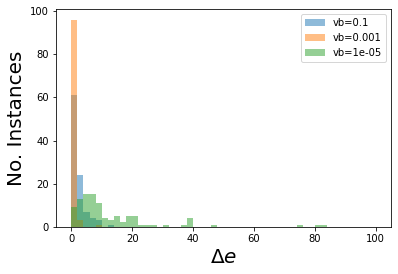

In [78]:
de={}

for vb in vbs:
    de[vb]=np.abs(gs_energy[vb]-min_energy[vb])
    print(f'vb={vb}, de={np.average(de[vb])*627} \n')
    print(f'vb={vb} max de ={np.max(de[vb])*627} \n')
    plt.hist(de[vb]*627,bins=50,label=f'vb={vb}',range=(0,100),alpha=0.5)
plt.xlabel(r'$\Delta e$',fontsize=20)
plt.ylabel(r'No. Instances',fontsize=20)
plt.legend()
plt.show()
    

vb=0.1, dn=0.008647216471569862 

vb=0.1 max dn =0.022999299866049674 

vb=0.001, dn=0.003474923649053926 

vb=0.001 max dn =0.018440842408339108 

vb=1e-05, dn=0.022243148094151132 

vb=1e-05 max dn =0.08479748056669027 



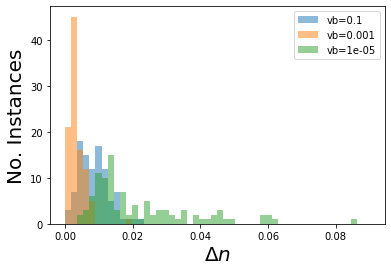

In [79]:
dn={}

for vb in vbs:
    dn[vb]=np.sum(np.abs(gs_density[vb]-min_density[vb]),axis=-1)*(1/256)
    print(f'vb={vb}, dn={np.average(dn[vb])} \n')
    print(f'vb={vb} max dn ={np.max(dn[vb])} \n')
    plt.hist(dn[vb],bins=50,label=f'vb={vb}',range=(0,0.09),alpha=0.5)
plt.xlabel(r'$\Delta n$',fontsize=20)
plt.ylabel(r'No. Instances',fontsize=20)
plt.legend()
plt.show()

#### Different Latent Dimension $l_d=4,8,16$

Imports

In [83]:
import numpy as np
import matplotlib.pyplot as plt 

Load Data

In [84]:
lds=[4,8,16]
min_energy={}
gs_energy={}
min_density={}
gs_density={}

for ld in lds:
    data_density=np.load(f'data/gradient_descent/meyer_case/DFTVAEnorm_hidden_channels_vae_[60, 60, 60, 60, 60]_hidden_channels_dft_[60, 60, 60, 60, 60]_kernel_size_13_pooling_size_2_latent_dimension_{ld}_l1_0.0_l2_0.001_number_istances_100_n_ensamble_1_different_initial_epochs_14999_lr_1_density.npz')
    data_energy=np.load(f'data/gradient_descent/meyer_case/DFTVAEnorm_hidden_channels_vae_[60, 60, 60, 60, 60]_hidden_channels_dft_[60, 60, 60, 60, 60]_kernel_size_13_pooling_size_2_latent_dimension_{ld}_l1_0.0_l2_0.001_number_istances_100_n_ensamble_1_different_initial_epochs_14999_lr_1_energy.npz')
    
    min_energy[ld]=data_energy['min_energy']
    gs_energy[ld]=data_energy['gs_energy']
    
    gs_density[ld]=data_density['gs_density']
    min_density[ld]=data_density['min_density']
    

Visualization

ld=4, de=0.6322110702599638 

ld=4 max de =10.039360637350615 

ld=8, de=0.6474458333887709 

ld=8 max de =8.044668076216928 

ld=16, de=0.6730503207514894 

ld=16 max de =10.476058074478066 



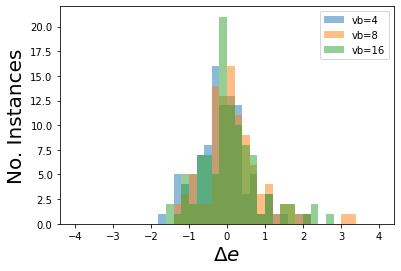

In [86]:
de={}
de_abs={}
for ld in lds:
    de_abs[ld]=np.abs(gs_energy[ld]-min_energy[ld])
    de[ld]=(gs_energy[ld]-min_energy[ld])
    print(f'ld={ld}, de={np.average(de_abs[ld])*627} \n')
    print(f'ld={ld} max de ={np.max(de_abs[ld])*627} \n')
    plt.hist(de[ld]*627,bins=40,label=f'vb={ld}',range=(-4,4),alpha=0.5)
plt.xlabel(r'$\Delta e$',fontsize=20)
plt.ylabel(r'No. Instances',fontsize=20)
plt.legend()
plt.show()